In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/nursery.csv')
df.head()

,parents,has_nurs,form,children,housing,finance,social,health,class
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority


In [3]:
df.head().T

,0,1,2,3,4
parents,usual,usual,usual,usual,usual
has_nurs,proper,proper,proper,proper,proper
form,complete,complete,complete,complete,complete
children,1,1,1,1,1
housing,convenient,convenient,convenient,convenient,convenient
finance,convenient,convenient,convenient,convenient,convenient
social,nonprob,nonprob,nonprob,slightly_prob,slightly_prob
health,recommended,priority,not_recom,recommended,priority
class,recommend,priority,not_recom,recommend,priority


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12960 entries, 0 to 12959
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   parents   12960 non-null  object
 1   has_nurs  12960 non-null  object
 2   form      12960 non-null  object
 3   children  12960 non-null  object
 4   housing   12960 non-null  object
 5   finance   12960 non-null  object
 6   social    12960 non-null  object
 7   health    12960 non-null  object
 8   class     12960 non-null  object
dtypes: object(9)
memory usage: 911.4+ KB


In [5]:
df.describe()

,parents,has_nurs,form,children,housing,finance,social,health,class
count,12960,12960,12960,12960,12960,12960,12960,12960,12960
unique,3,5,4,4,3,2,3,3,5
top,usual,proper,complete,1,convenient,convenient,nonprob,recommended,not_recom
freq,4320,2592,3240,3240,4320,6480,4320,4320,4320


In [6]:
df["class"].value_counts()

class
not_recom     4320
priority      4266
spec_prior    4044
very_recom     328
recommend        2
Name: count, dtype: int64

In [7]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

parents
['usual' 'pretentious' 'great_pret']
3

has_nurs
['proper' 'less_proper' 'improper' 'critical' 'very_crit']
5

form
['complete' 'completed' 'incomplete' 'foster']
4

children
['1' '2' '3' 'more']
4

housing
['convenient' 'less_conv' 'critical']
3

finance
['convenient' 'inconv']
2

social
['nonprob' 'slightly_prob' 'problematic']
3

health
['recommended' 'priority' 'not_recom']
3

class
['recommend' 'priority' 'not_recom' 'very_recom' 'spec_prior']
5



In [8]:
df.isnull().sum()

parents     0
has_nurs    0
form        0
children    0
housing     0
finance     0
social      0
health      0
class       0
dtype: int64

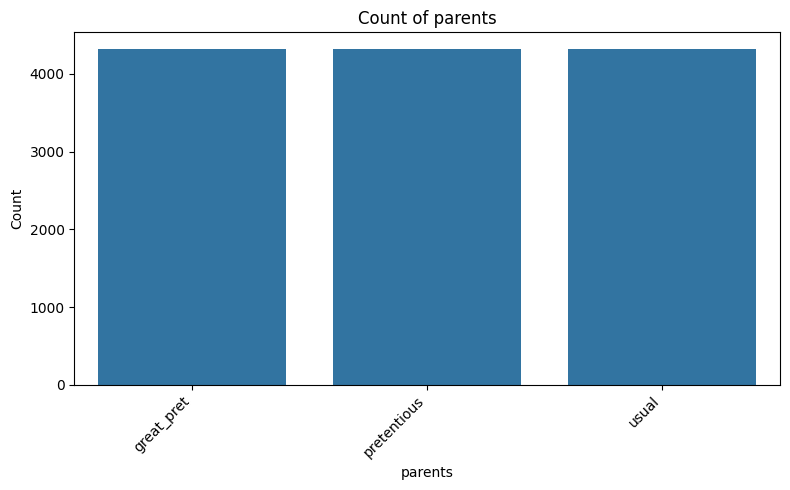

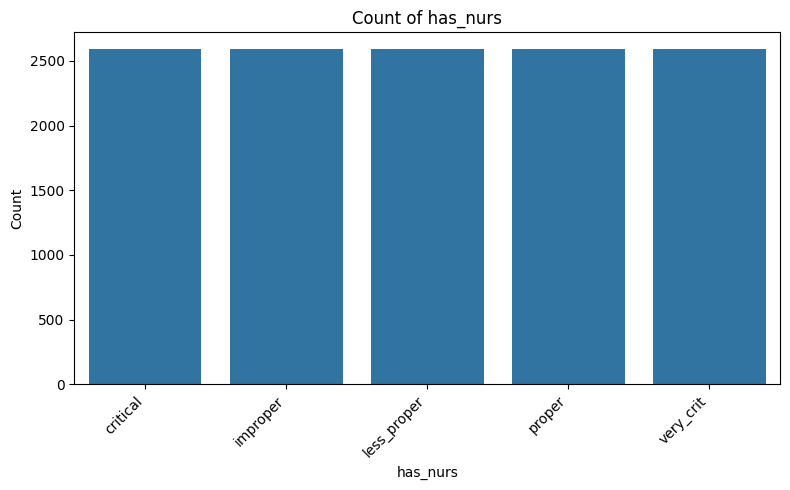

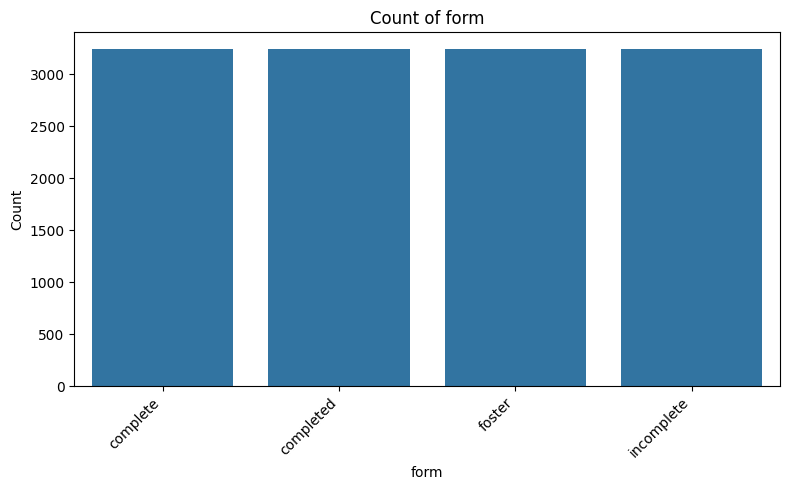

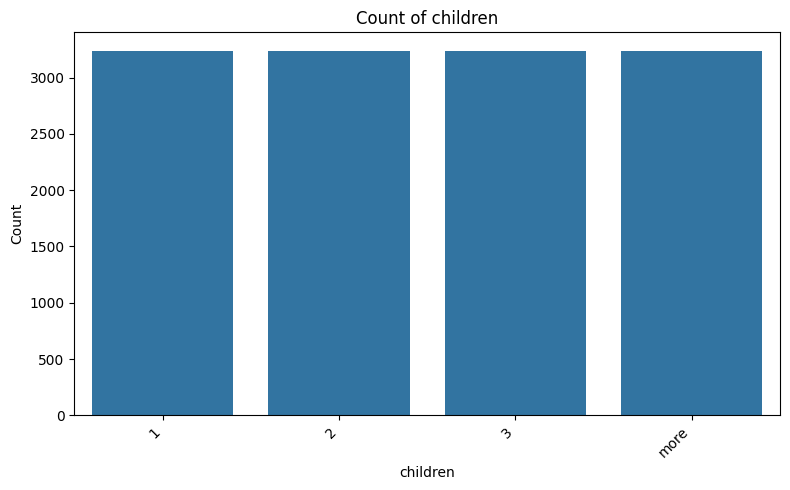

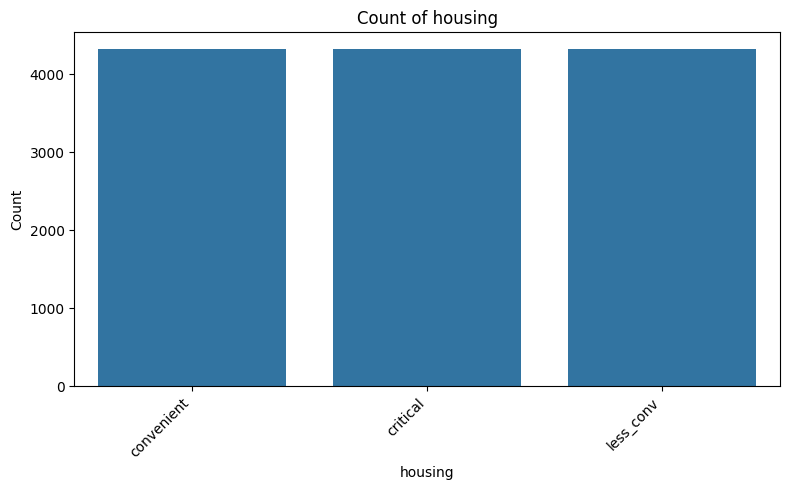

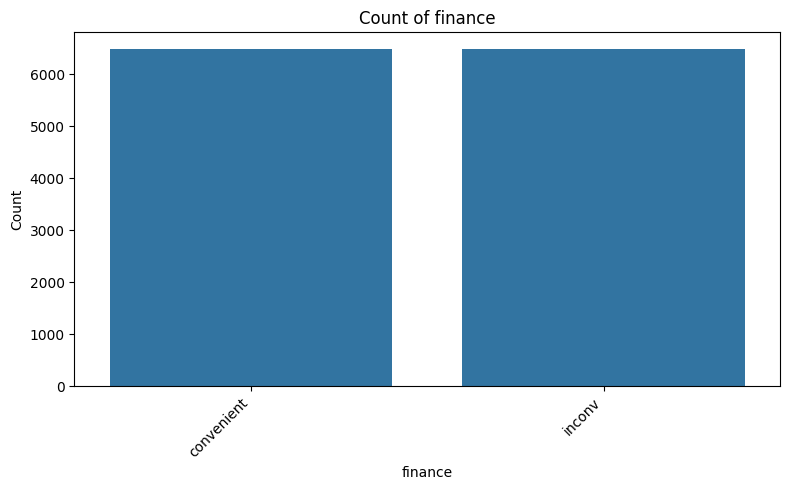

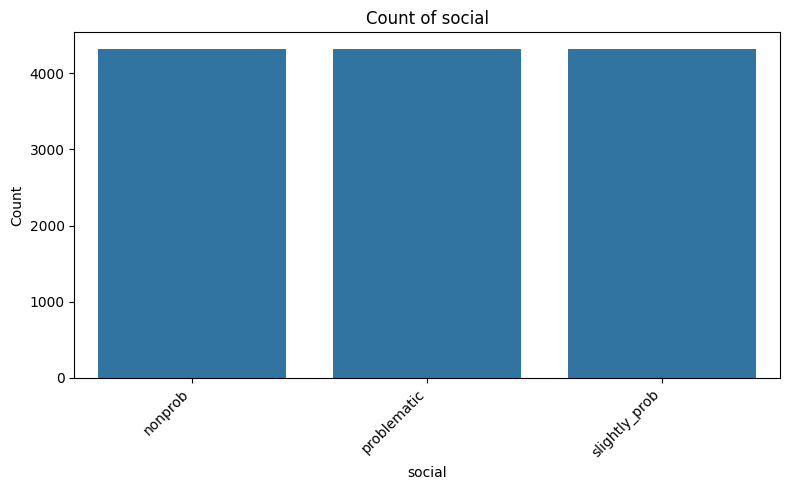

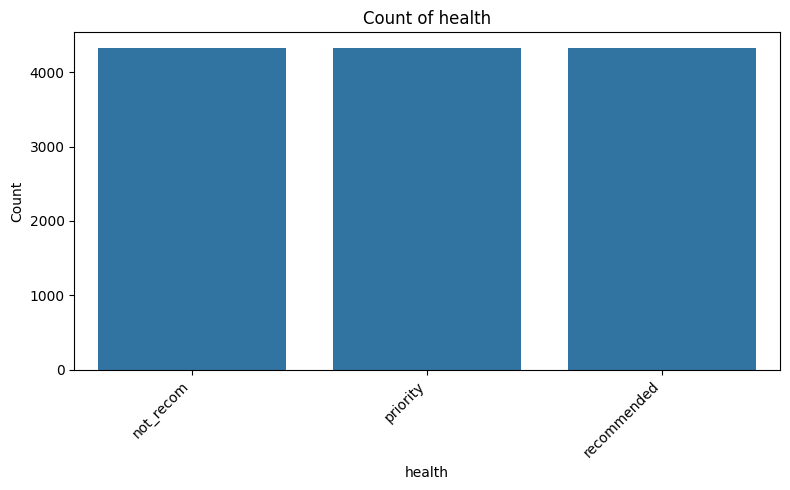

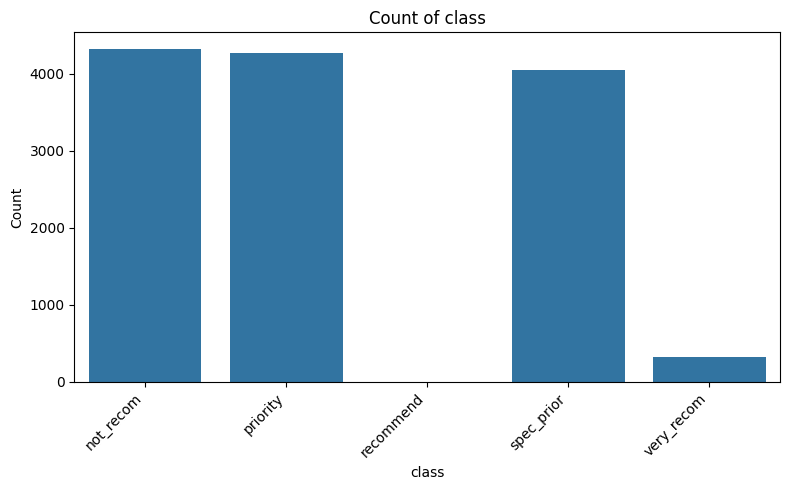

In [9]:
cols = [c for c in df.columns]
for col in cols:
    plt.figure(figsize=(8, 5))
    ax = sns.countplot(x=col, data=df, order=sorted(df[col].dropna().unique()))
    ax.set_title(f'Count of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    
    plt.show()

Perform the train/validation/test split with Scikit-Learn

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction import DictVectorizer

In [11]:
df['class']

0         recommend
1          priority
2         not_recom
3         recommend
4          priority
            ...    
12955    spec_prior
12956     not_recom
12957    spec_prior
12958    spec_prior
12959     not_recom
Name: class, Length: 12960, dtype: object

Initialize and fit the LabelEncoder.
Fit the encoder to learn all unique categories in your target variable 'class'
Transform the target variable.

- ['not_recom', 'priority', 'recommend', 'spec_prior', 'very_recom']
- [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]

In [12]:
encoder = LabelEncoder()
encoder.fit(df['class'])
df['class'] = encoder.transform(df['class'])

# print(list(encoder.classes_))
# print(list(encoder.transform(encoder.classes_)))
# encoder.inverse_transform([0])

In [13]:
df.head()

,parents,has_nurs,form,children,housing,finance,social,health,class
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,2
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,1
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,0
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,2
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,1


In [14]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [15]:
len(df_train), len(df_val), len(df_test)

(7776, 2592, 2592)

In [16]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [17]:
y_train = df_train['class'].values
y_val = df_val['class'].values
y_test = df_test['class'].values

In [18]:
len(y_train), len(y_val), len(y_test)

(7776, 2592, 2592)

Delete the target variable from the train/val/test dataframe.

In [19]:
del df_train['class']
del df_val['class']
del df_test['class']

In [20]:
df_val.head(2)

,parents,has_nurs,form,children,housing,finance,social,health
0,pretentious,critical,completed,more,critical,convenient,problematic,not_recom
1,usual,very_crit,completed,1,convenient,convenient,problematic,recommended


In [23]:
df_full_train['class'].value_counts(normalize=True)

class
0    0.332755
1    0.327257
3    0.314333
4    0.025656
Name: proportion, dtype: float64

Checking feature importance, mutual information

In [24]:
from sklearn.metrics import mutual_info_score

In [25]:
def mutual_info_churn_score(series):
    return mutual_info_score(df_full_train['class'], series)

In [26]:
categorical = ['parents', 'has_nurs', 'form', 'children','housing', 'finance', 'social','health']

In [27]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending = False)

health      0.663818
has_nurs    0.136361
parents     0.052024
social      0.014930
housing     0.013231
children    0.009573
form        0.004185
finance     0.002627
dtype: float64

continuation

In [28]:
dv = DictVectorizer(sparse=False)

In [29]:
train_dicts = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

In [30]:
dv.get_feature_names_out()

array(['children=1', 'children=2', 'children=3', 'children=more',
       'finance=convenient', 'finance=inconv', 'form=complete',
       'form=completed', 'form=foster', 'form=incomplete',
       'has_nurs=critical', 'has_nurs=improper', 'has_nurs=less_proper',
       'has_nurs=proper', 'has_nurs=very_crit', 'health=not_recom',
       'health=priority', 'health=recommended', 'housing=convenient',
       'housing=critical', 'housing=less_conv', 'parents=great_pret',
       'parents=pretentious', 'parents=usual', 'social=nonprob',
       'social=problematic', 'social=slightly_prob'], dtype=object)

In [31]:
val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [32]:
test_dicts = df_test.to_dict(orient='records')
X_test = dv.transform(test_dicts)

## Train and Tune RandomForest

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, log_loss
from sklearn.tree import export_text

In [34]:
rf = RandomForestClassifier(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)

y_pred = rf.predict_proba(X_val)
auc = roc_auc_score(y_val, y_pred, multi_class='ovr', average='weighted')
auc

0.9984684840703569

Validation Accuracy: 0.9745

Log Loss: 0.0940

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       869
           1       0.96      0.96      0.96       854
           3       0.96      0.98      0.97       807
           4       0.94      0.77      0.85        62

    accuracy                           0.97      2592
   macro avg       0.97      0.93      0.95      2592
weighted avg       0.97      0.97      0.97      2592


--- Confusion Matrix (Raw Data) ---
[[869   0   0   0]
 [  0 821  30   3]
 [  0  19 788   0]
 [  0  14   0  48]]


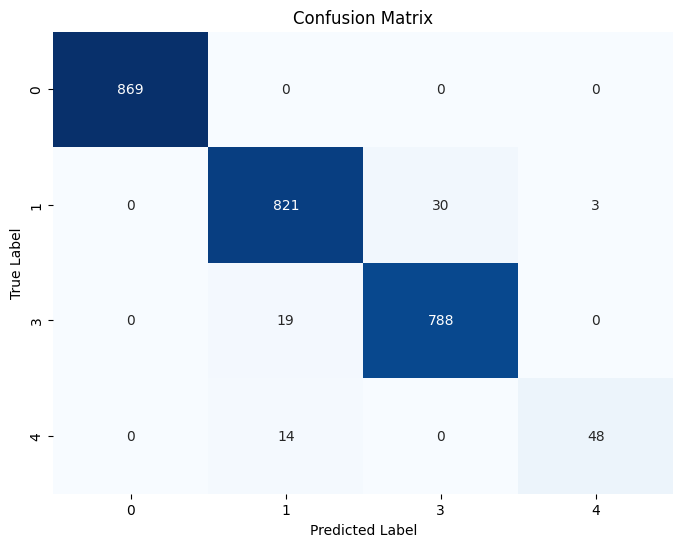

In [35]:
rf = RandomForestClassifier(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_val)
y_pred_proba = rf.predict_proba(X_val)

accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.4f}\n")

try:
    loss = log_loss(y_val, y_pred_proba)
    print(f"Log Loss: {loss:.4f}\n")
except ValueError as e:
    print(f"Cannot calculate Log Loss: {e}. Check if predict_proba is available.")


print("Classification Report:")
print(classification_report(y_val, y_pred))


conf_matrix = confusion_matrix(y_val, y_pred)
print("\n--- Confusion Matrix (Raw Data) ---")
print(conf_matrix)

# Visualize the Confusion Matrix nicely using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [36]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_val)
    y_pred_proba = rf.predict_proba(X_val)

    accuracy = accuracy_score(y_val, y_pred)
    print(f"Validation Accuracy: {accuracy:.4f}\n")

    try:
        loss = log_loss(y_val, y_pred_proba)
        print(f"Log Loss: {loss:.4f}\n")
    except ValueError as e:
        print(f"Cannot calculate Log Loss: {e}. Check if predict_proba is available.")


    print("Classification Report:")
    print(classification_report(y_val, y_pred))


    conf_matrix = confusion_matrix(y_val, y_pred)
    print("\n--- Confusion Matrix (Raw Data) ---")
    print(conf_matrix)

    # Visualize the Confusion Matrix nicely using Seaborn
    # plt.figure(figsize=(8, 6))
    # sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
    #             xticklabels=rf.classes_, yticklabels=rf.classes_)
    # plt.xlabel('Predicted Label')
    # plt.ylabel('True Label')
    # plt.title('Confusion Matrix')
    # plt.show()

    scores.append((n, accuracy))

Validation Accuracy: 0.9745

Log Loss: 0.0940

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       869
           1       0.96      0.96      0.96       854
           3       0.96      0.98      0.97       807
           4       0.94      0.77      0.85        62

    accuracy                           0.97      2592
   macro avg       0.97      0.93      0.95      2592
weighted avg       0.97      0.97      0.97      2592


--- Confusion Matrix (Raw Data) ---
[[869   0   0   0]
 [  0 821  30   3]
 [  0  19 788   0]
 [  0  14   0  48]]
Validation Accuracy: 0.9807

Log Loss: 0.0910

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       869
           1       0.98      0.96      0.97       854
           3       0.97      0.99      0.98       807
           4       0.96      0.87      0.92        62

    accuracy                           

Validation Accuracy: 0.9826

Log Loss: 0.0926

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       869
           1       0.98      0.97      0.97       854
           3       0.97      0.99      0.98       807
           4       0.96      0.84      0.90        62

    accuracy                           0.98      2592
   macro avg       0.98      0.95      0.96      2592
weighted avg       0.98      0.98      0.98      2592


--- Confusion Matrix (Raw Data) ---
[[869   0   0   0]
 [  0 826  26   2]
 [  0   7 800   0]
 [  0  10   0  52]]
Validation Accuracy: 0.9830

Log Loss: 0.0926

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       869
           1       0.98      0.97      0.97       854
           3       0.97      0.99      0.98       807
           4       0.98      0.84      0.90        62

    accuracy                           

In [37]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'accuracy'])
df_scores.sort_values('accuracy', ascending=False).head(2)

,n_estimators,accuracy
9,100,0.984182
11,120,0.983796


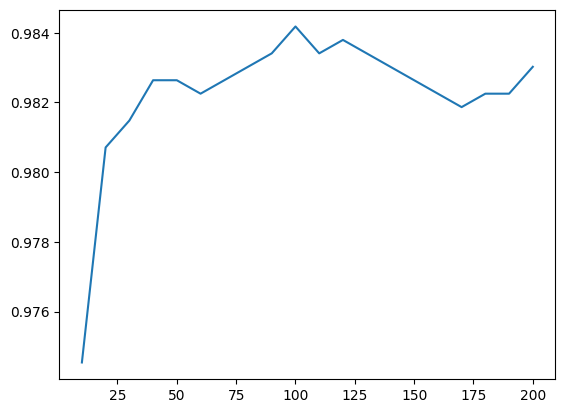

In [38]:
plt.plot(df_scores.n_estimators, df_scores.accuracy)

In [39]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)
        y_pred_proba = rf.predict_proba(X_val)

        accuracy = accuracy_score(y_val, y_pred)

        scores.append((d, n, accuracy))

In [40]:
columns = ['max_depth', 'n_estimators', 'accuracy']
df_scores = pd.DataFrame(scores, columns=columns)

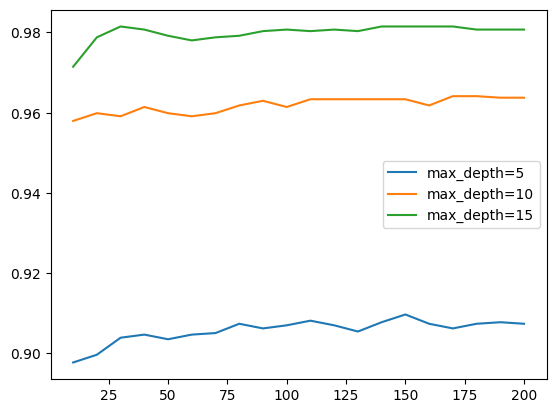

In [41]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.accuracy,
             label='max_depth=%d' % d)

plt.legend()

In [42]:
max_depth = 15

In [43]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)
        y_pred_proba = rf.predict_proba(X_val)
                                        
        accuracy = accuracy_score(y_val, y_pred)

        scores.append((s, n, accuracy))

In [44]:
columns = ['min_samples_leaf', 'n_estimators', 'accuracy']
df_scores = pd.DataFrame(scores, columns=columns)

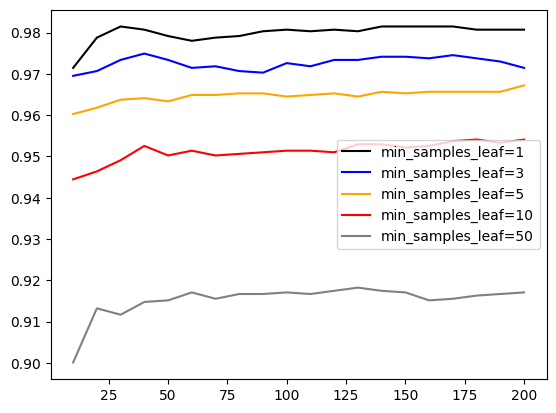

In [45]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.accuracy,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

In [46]:
min_samples_leaf = 1

In [47]:
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=15,
                            min_samples_leaf=1,
                            random_state=1)
rf.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Validation Accuracy: 0.9807

Log Loss: 0.0954

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       869
           1       0.98      0.96      0.97       854
           3       0.96      0.99      0.98       807
           4       0.98      0.82      0.89        62

    accuracy                           0.98      2592
   macro avg       0.98      0.94      0.96      2592
weighted avg       0.98      0.98      0.98      2592


--- Confusion Matrix (Raw Data) ---
[[869   0   0   0]
 [  0 822  31   1]
 [  0   7 800   0]
 [  0  11   0  51]]


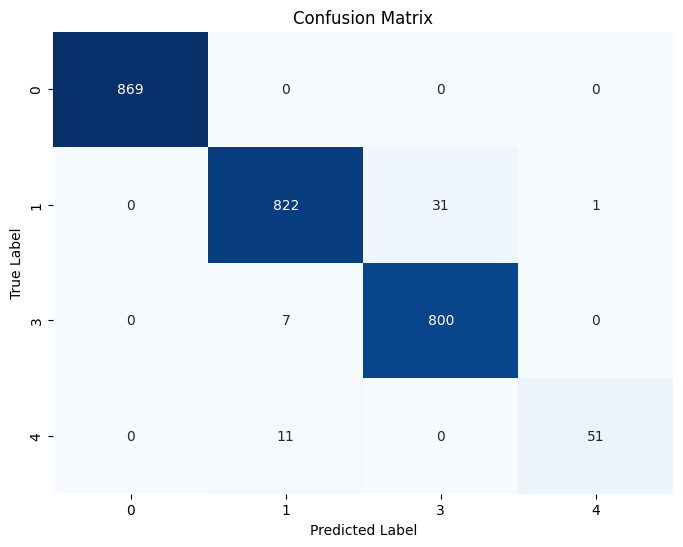

In [48]:
y_pred = rf.predict(X_val)
y_pred_proba = rf.predict_proba(X_val)

accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.4f}\n")

try:
    loss = log_loss(y_val, y_pred_proba)
    print(f"Log Loss: {loss:.4f}\n")
except ValueError as e:
    print(f"Cannot calculate Log Loss: {e}. Check if predict_proba is available.")


print("Classification Report:")
print(classification_report(y_val, y_pred))


conf_matrix = confusion_matrix(y_val, y_pred)
print("\n--- Confusion Matrix (Raw Data) ---")
print(conf_matrix)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Train XGBoost and Tune

In [7]:
import xgboost as xgb

In [ ]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

dtest = xgb.DMatrix(X_test, label=y_test, feature_names=features)

In [65]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [66]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'multi:softmax',
    'num_class': 5,
    'eval_metric': 'merror',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

[0]	train-merror:0.10340	val-merror:0.10262
[5]	train-merror:0.05813	val-merror:0.06289
[10]	train-merror:0.02353	val-merror:0.02971
[15]	train-merror:0.00836	val-merror:0.01582
[20]	train-merror:0.00180	val-merror:0.00540
[25]	train-merror:0.00103	val-merror:0.00347
[30]	train-merror:0.00026	val-merror:0.00231
[35]	train-merror:0.00026	val-merror:0.00154
[40]	train-merror:0.00013	val-merror:0.00154
[45]	train-merror:0.00000	val-merror:0.00116
[50]	train-merror:0.00000	val-merror:0.00116
[55]	train-merror:0.00000	val-merror:0.00116
[60]	train-merror:0.00000	val-merror:0.00116
[65]	train-merror:0.00000	val-merror:0.00116
[70]	train-merror:0.00000	val-merror:0.00116
[75]	train-merror:0.00000	val-merror:0.00116
[80]	train-merror:0.00000	val-merror:0.00077
[85]	train-merror:0.00000	val-merror:0.00077
[90]	train-merror:0.00000	val-merror:0.00039
[95]	train-merror:0.00000	val-merror:0.00039
[100]	train-merror:0.00000	val-merror:0.00039
[105]	train-merror:0.00000	val-merror:0.00039
[110]	trai

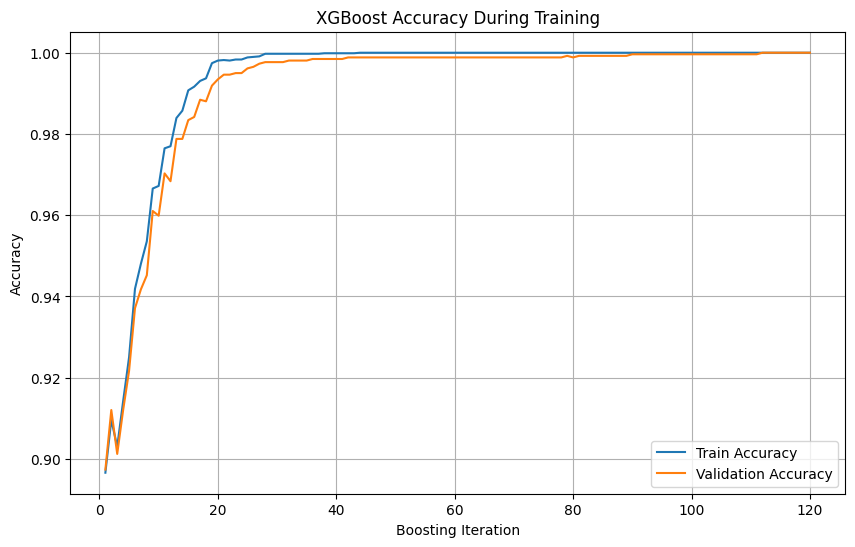

In [67]:
evals_result = {}

model = xgb.train(params=xgb_params,
                  dtrain=dtrain,
                  num_boost_round=120,
                  verbose_eval=5,
                  evals=watchlist,
                  evals_result=evals_result)


# XGBoost logs the 'merror' under the key 'merror' in the evals_result dictionary
train_errors = list(evals_result['train']['merror']) 
val_errors = list(evals_result['val']['merror'])

# Calculate Accuracy: Accuracy = 1 - Error Rate
train_accuracies = [1 - error for error in train_errors]
val_accuracies = [1 - error for error in val_errors]

columns = ['iter', 'train_accuracy', 'val_accuracy']

df_scores = pd.DataFrame(
    list(zip(
        range(1, len(train_accuracies) + 1),
        train_accuracies,
        val_accuracies
    )), columns=columns)

# --- Plotting Accuracy ---
plt.figure(figsize=(10, 6))
plt.plot(df_scores.iter, df_scores.train_accuracy, label='Train Accuracy')
plt.plot(df_scores.iter, df_scores.val_accuracy, label='Validation Accuracy')

plt.xlabel('Boosting Iteration')
plt.ylabel('Accuracy')
plt.title('XGBoost Accuracy During Training')
plt.legend()
plt.grid(True)
plt.show()


In [68]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_accuracy', 'val_accuracy']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [69]:
scores = {}

In [76]:
%%capture output

xgb_params = {
    'eta': 0.01, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'multi:softmax',
    'eval_metric': 'merror',
    'num_class' : 5,

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [77]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.01'

In [78]:
scores.keys()

dict_keys(['eta=0.2', 'eta=0.1', 'eta=0.01'])

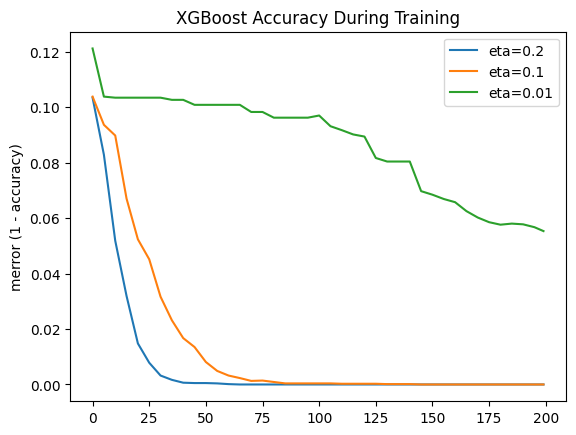

In [79]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.train_accuracy, label=key)

plt.ylabel('merror (1 - accuracy)')
plt.title('XGBoost Accuracy During Training')
plt.legend()

In [80]:
scores = {}

In [88]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'multi:softmax',
    'eval_metric': 'merror',
    'num_class' : 5,

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [89]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=6'

In [90]:
scores.keys()

dict_keys(['max_depth=10', 'max_depth=3', 'max_depth=4', 'max_depth=6'])

Text(0.5, 1.0, 'XGBoost Accuracy During Training')

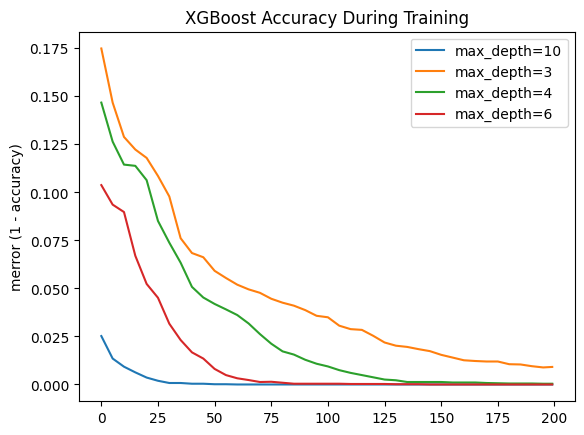

In [91]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.train_accuracy, label=max_depth)

plt.legend()
plt.ylabel('merror (1 - accuracy)')
plt.title('XGBoost Accuracy During Training')

In [92]:
# Train XGBoost models for each eta and store AUC results
scores = {} # dictionary to store results for each eta
etas = [0.01, 0.05, 0.1, 0.2, 0.3, 1.0] # list of parameter values. in this case it is 'eta'.

for eta in etas:
    evals_result = {}

    xgb_params = {
        'eta': eta,
        'max_depth': 6,
        'min_child_weight': 1,

        'objective': 'multi:softmax',
        'num_class' : 5,

        'eval_metric': ['merror', 'mlogloss'],

        'nthread': 8,
        'seed': 1,
        'verbosity': 1
    }

    model = xgb.train(
        xgb_params,
        dtrain,
        evals=watchlist,
        verbose_eval=0,
        num_boost_round=200,
        evals_result=evals_result
    )

    train_errors = list(evals_result['train']['merror']) 
    val_errors = list(evals_result['val']['merror'])

    # Calculate Accuracy: Accuracy = 1 - Error Rate
    train_accuracies = [1 - error for error in train_errors]
    val_accuracies = [1 - error for error in val_errors]

    columns = ['iter', 'train_accuracy', 'val_accuracy']

    df_scores = pd.DataFrame(
    list(zip(
        range(1, len(train_accuracies) + 1),
        train_accuracies,
        val_accuracies
    )), columns=columns)

    key = f'eta={eta}'
    scores[key] = df_scores

In [93]:
scores.keys()

dict_keys(['eta=0.01', 'eta=0.05', 'eta=0.1', 'eta=0.2', 'eta=0.3', 'eta=1.0'])

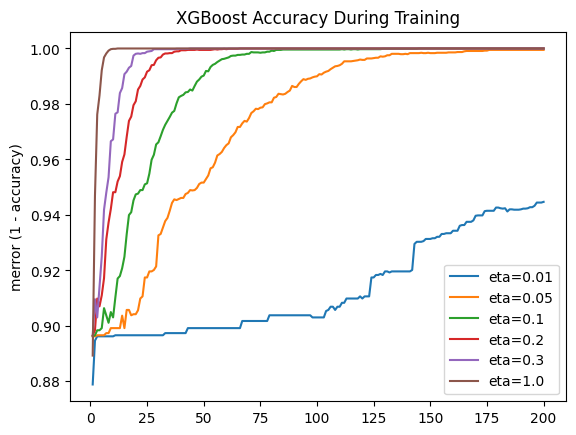

In [94]:
for key, df_score in scores.items():
    plt.plot(df_score.iter, df_score.train_accuracy, label=key)

plt.ylabel('merror (1 - accuracy)')
plt.title('XGBoost Accuracy During Training')
plt.legend()

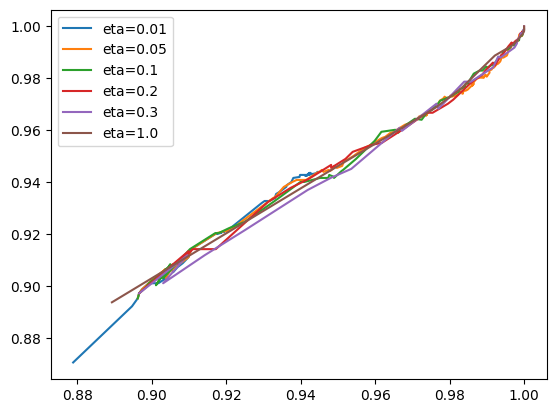

In [95]:
for key, df_score in scores.items():
    plt.plot(df_score.train_accuracy, df_score.val_accuracy, label=key)


plt.legend()

Final parameter

In [ ]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'multi:softmax',
    'num_class' : 5,

    'eval_metric': ['merror', 'mlogloss'],

    'nthread': 8,
    'seed': 1,
    'verbosity': 1
    }

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

Selecting the final model

In [96]:
rf = RandomForestClassifier(n_estimators=200, max_depth=15, min_samples_leaf=1, random_state=1)
rf.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Validation Accuracy: 0.9807

Log Loss: 0.0954

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       869
           1       0.98      0.96      0.97       854
           3       0.96      0.99      0.98       807
           4       0.98      0.82      0.89        62

    accuracy                           0.98      2592
   macro avg       0.98      0.94      0.96      2592
weighted avg       0.98      0.98      0.98      2592


--- Confusion Matrix (Raw Data) ---
[[869   0   0   0]
 [  0 822  31   1]
 [  0   7 800   0]
 [  0  11   0  51]]


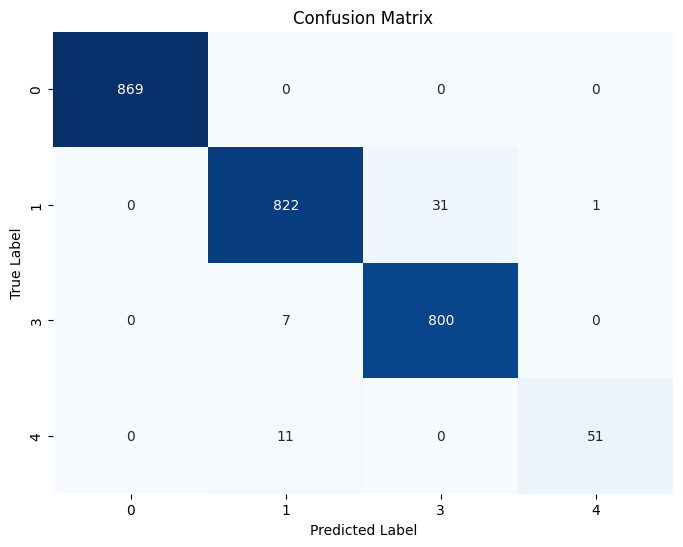

In [97]:
y_pred = rf.predict(X_val)
y_pred_proba = rf.predict_proba(X_val)

accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.4f}\n")

try:
    loss = log_loss(y_val, y_pred_proba)
    print(f"Log Loss: {loss:.4f}\n")
except ValueError as e:
    print(f"Cannot calculate Log Loss: {e}. Check if predict_proba is available.")


print("Classification Report:")
print(classification_report(y_val, y_pred))


conf_matrix = confusion_matrix(y_val, y_pred)
print("\n--- Confusion Matrix (Raw Data) ---")
print(conf_matrix)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [98]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'multi:softmax',
    'num_class' : 5,

    'eval_metric': ['merror', 'mlogloss'],

    'nthread': 8,
    'seed': 1,
    'verbosity': 1
    }

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

In [99]:
y_pred = model.predict(dval)
accuracy_score(y_val, y_pred)

0.9984567901234568


--- Confusion Matrix (Raw Data) ---
[[869   0   0   0]
 [  0 850   4   0]
 [  0   0 807   0]
 [  0   0   0  62]]


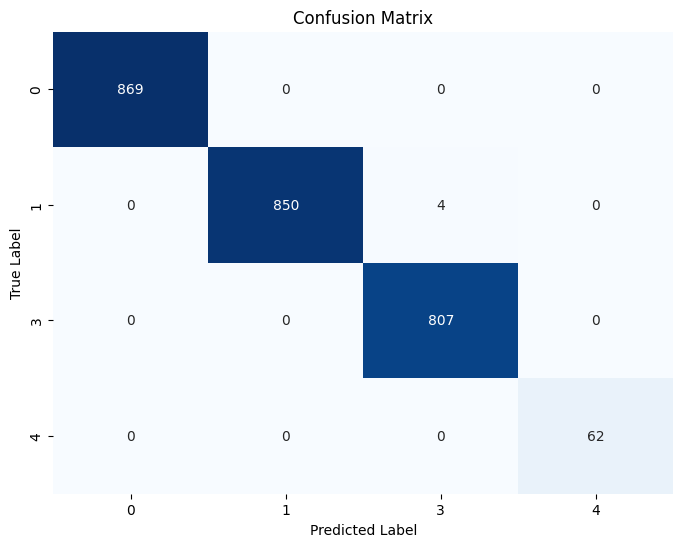

In [100]:
conf_matrix = confusion_matrix(y_val, y_pred)
print("\n--- Confusion Matrix (Raw Data) ---")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [104]:
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=features)

In [105]:
y_pred = model.predict(dtest)
accuracy_score(y_test, y_pred)

0.9984567901234568


--- Confusion Matrix (Raw Data) ---
[[870   0   0   0   0]
 [  0 871   0   2   0]
 [  0   0   0   0   2]
 [  0   0   0 785   0]
 [  0   0   0   0  62]]


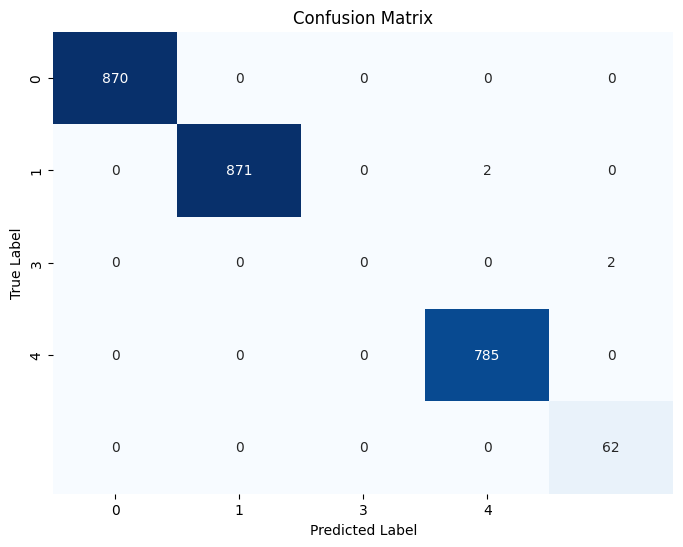

In [108]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\n--- Confusion Matrix (Raw Data) ---")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [110]:
train_dicts[1]

{'parents': 'great_pret',
 'has_nurs': 'improper',
 'form': 'completed',
 'children': 'more',
 'housing': 'less_conv',
 'finance': 'inconv',
 'social': 'problematic',
 'health': 'not_recom'}

In [ ]:
profile = {
    'parents': 'great_pret',
    'has_nurs': 'improper',
    'form': 'completed',
    'children': '2',
    'housing': 'less_conv',
    'finance': 'inconv',
    'social': 'problematic',
    'health': 'priority'
}


In [125]:
X = dv.transform(profile)

In [126]:
dX = xgb.DMatrix(X, feature_names=features)

In [ ]:
model.predict(dX)[0]

np.float32(3.0)

In [ ]:
import pandas as pd
import numpy as np
import sklearn

import pickle
from sklearn.feature_extraction import DictVectorizer
import xgboost as xgb

In [129]:
with open('model.bin', 'wb') as f_out:
    pickle.dump((dv, model), f_out)

In [132]:
!ls -lh

total 2.1M
-rw-rw-rw-  1 codespace root      5.2K Nov 16 13:36 README.md
drwxrwxrwx+ 2 codespace codespace 4.0K Nov 17 09:21 data
-rw-rw-rw-  1 codespace codespace 1.6M Nov 18 18:09 model.bin
-rw-rw-rw-  1 codespace codespace 486K Nov 17 14:50 notebook.ipynb


In [4]:
with open('model.bin', 'rb') as f_in:
    (dv, model) = pickle.load(f_in)

In [5]:
dv

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [ ]:
profile = {
    'parents': 'great_pret',
    'has_nurs': 'improper',
    'form': 'completed',
    'children': '2',
    'housing': 'less_conv',
    'finance': 'inconv',
    'social': 'problematic',
    'health': 'priority'
}

features = list(dv.get_feature_names_out())
X = dv.transform(profile)
dX = xgb.DMatrix(X, feature_names=features)
class_of_application = model.predict(dX)[0]

In [11]:
n = class_of_application

if n == 0:
    print('This application is not_recommeded')
elif n == 1:
    print('This application is priority')
elif n == 2:
    print('This application is recommended')
elif n == 3:
    print('This application is Special_priority')
else:
    print('This application is very_recommeded')

This application is Special_priority


In [13]:
from sklearn.pipeline import make_pipeline